In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

посчитать эффективность работу продукта (т.е. сайта) за последние два года. 

Оценку необходимо производить через ключевые показатели эффективности:
    
1.	Прирост покупателей (User Growth Rate)

2.	Churn Rate And Retention Rate 

3.	Daily Active User (DAU)

4.	Monthly Active User (MAU)

5.	Наиболее популярные продаваемые товары (Топ-10)

6.	Товары с самым высоким доходом

7.	Объем выручки

Дополнительно он попросил ответить на следующие вопросы:
    
-  может ли статус заказа повлиять на эффективность компании?

- влияет ли частота входа на сайт на количество совершаемых заказов?

Результат. 

На выходе ожидается анализ, проведенный с помощью языка программирования  Python, 

включая полную визуализацию результатов и выводы. 

По результатам необходимо представить ноутбук Jupyter.

sales_orders_items:

•	order_item_id - идентификатор строки заказа (первичный ключ таблицы)

•	fk_product_id - артикул товара

•	fk_order_id - номер заказа

•	ordered_quantity - количество единиц товара в заказе

•	order_quantity_accepted - колиечество единиц товара, доставленных покупателю

•	rate - цена

login_logs:

•	login_log_id - идентификатор строки таблицы с логами авторизации пользователей (первичный ключ таблицы)

•	user_id - идентификатор пользователя

•	login_time - дата и время авторизации

sales_orders:

•	order_id - номер заказа (первичный ключ таблицы)

•	fk_buyer_id - идентификатор покупателя

•	fk_depot_id - идентификатор склада

•	sales_order_status - статус заказа

•	creation_time - дата и время создания заказа


In [2]:
# Функция для форматирования даты в нескольких сетах
def redate(x, recode='%Y-%m-%d %H:%M:%S.%f'):
    return dt.datetime.strptime(x, recode)

In [3]:
df_logs = pd.read_csv('login_logs (2).csv')
df_logs['login_time'] = df_logs['login_time'].apply(redate)
df_logs['login_date'] = df_logs['login_time'].apply(lambda x: x.date() )
df_logs['login_year'] = df_logs['login_time'].apply(lambda x: x.year )
df_logs['login_month'] = df_logs['login_time'].apply(lambda x: x.month )
df_logs['login_day'] = df_logs['login_time'].apply(lambda x: x.day )
df_logs

,login_log_id,user_id,login_time,login_date,login_year,login_month,login_day
0,1385328,99160,2021-07-01 00:00:33,2021-07-01,2021,7,1
1,1385329,83272,2021-07-01 00:00:38,2021-07-01,2021,7,1
2,1385330,83272,2021-07-01 00:00:42,2021-07-01,2021,7,1
3,1385331,96640,2021-07-01 00:02:08,2021-07-01,2021,7,1
4,1385332,99160,2021-07-01 00:02:38,2021-07-01,2021,7,1
...,...,...,...,...,...,...,...
666352,4670509,207632,2022-07-30 23:47:02,2022-07-30,2022,7,30
666353,4670510,207632,2022-07-30 23:49:39,2022-07-30,2022,7,30
666354,4670511,207632,2022-07-30 23:49:43,2022-07-30,2022,7,30
666355,4670512,111788,2022-07-30 23:51:22,2022-07-30,2022,7,30


In [4]:
df_sales = pd.read_csv('sales_orders (2).csv')
df_sales['creation_time'] = df_sales['creation_time'].apply(redate)
df_sales['creation_date'] = df_sales['creation_time'].apply(lambda x: x.date() )
df_sales['creation_year'] = df_sales['creation_time'].apply(lambda x: x.year )
df_sales['creation_month'] = df_sales['creation_time'].apply(lambda x: x.month )
df_sales['creation_day'] = df_sales['creation_time'].apply(lambda x: x.day )

df_sales

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time,creation_date,creation_year,creation_month,creation_day
0,119874,82228,5,Rejected,2021-07-01 00:35:28,2021-07-01,2021,7,1
1,119877,40476,1,Rejected,2021-07-01 02:02:43,2021-07-01,2021,7,1
2,119880,41728,8,Shipped,2021-07-01 02:42:12,2021-07-01,2021,7,1
3,119883,97616,4,Rejected,2021-07-01 02:56:00,2021-07-01,2021,7,1
4,119886,12440,1,Rejected,2021-07-01 03:11:31,2021-07-01,2021,7,1
...,...,...,...,...,...,...,...,...,...
13625,318960,63380,10,Rejected,2022-07-30 16:02:58,2022-07-30,2022,7,30
13626,318963,69544,5,Rejected,2022-07-30 16:30:26,2022-07-30,2022,7,30
13627,318966,167048,1,Shipped,2022-07-30 16:57:31,2022-07-30,2022,7,30
13628,318969,122360,2,Rejected,2022-07-30 17:53:54,2022-07-30,2022,7,30


In [5]:
# Узнаём, что в сетах только июль за 2 года - а значит, группировать можно за год
df_sales.groupby(['creation_year','creation_month'])[['order_id']].count()

,,order_id
creation_year,creation_month,
2021,7,6216
2022,7,7414


In [6]:
df_items = pd.read_csv('sales_orders_items (2).csv')
df_items['sales'] = df_items.apply(lambda x: x['order_quantity_accepted']*x['rate'], axis = 1)

df_items

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate,sales
0,62609,7818,119874,1,0,"4,993.00",0.00
1,62610,7607,119877,1,0,"6,203.40",0.00
2,62611,9916,119880,2,2,"2,904.41","5,808.82"
3,62612,11118,119880,2,2,"2,205.00","4,410.00"
4,62613,12702,119880,2,2,"2,200.85","4,401.70"
...,...,...,...,...,...,...,...
20483,157584,10975,318966,1,1,"12,632.00","12,632.00"
20484,157585,10975,318966,1,0,"11,814.00",0.00
20485,157586,10975,318966,1,1,"10,110.00","10,110.00"
20486,157587,3284,318969,1,0,"5,271.00",0.00


In [7]:
df_sales['creation_time'][0].date()

datetime.date(2021, 7, 1)

# 1.	Прирост покупателей (User Growth Rate)

In [8]:
# Проверка заказов по статусам заказов - за оба года велика доля заказов Rejected
df_1 = df_sales.pivot_table(
    index='sales_order_status',
    columns='creation_year', 
    values='order_id',
    aggfunc='nunique'
)

for col in df_1.columns:
    df_1[col] = round( df_1[col] / df_1[col].sum() * 100, 2)

# Очень высокая доля отменённых заказов
df_1

creation_year,2021,2022
sales_order_status,,
Pending,0.29,0.34
Rejected,60.55,52.59
Review,NaN,0.01
Shipped,39.16,47.06


In [9]:
def delta_column(dframe):
    dframe['delta'] = dframe[2022] / dframe[2021] - 1
    print('delta done!')

In [10]:
df_2 = df_sales.query(
    'sales_order_status in ("Rejected","Shipped")'
).groupby(
    'creation_year'
)[['fk_buyer_id']].nunique().T

delta_column(df_2)

print(f"User Growth Rate = {df_2.iloc[0,-1]:.2%}" )

df_2

delta done!
User Growth Rate = 21.77%


creation_year,2021,2022,delta
fk_buyer_id,2444,2976,0.22


# 2.	Churn Rate And Retention Rate 

In [11]:
df_3 = df_sales.pivot_table(
    index='fk_buyer_id',
    columns='creation_year',
    values='order_id',
    aggfunc='nunique'
)

for col in df_3.columns:
    df_3[f'{col}_na'] =  df_3[col].notna()

def ch_re(x):
    if all([
        x['2021_na'] == True,
        x['2022_na'] == True
    ]):
        return 'Retention'
    elif all([
        x['2021_na'] == True,
        x['2022_na'] == False
    ]):
        return 'Churn'
    elif all([
        x['2021_na'] == False,
        x['2022_na'] == True
    ]):
        return 'New_client'
    
df_3['stat'] = df_3.apply(ch_re, axis=1)

df_4 = df_3.reset_index().groupby('stat')[['fk_buyer_id']].nunique()

df_4.columns = ['buyers']

df_4['rate'] = df_4['buyers'] / df_3[ df_3['2021_na'] ].shape[0]

df_4 = df_4.reset_index().sort_values(by='rate').set_index('stat')

df_4

,buyers,rate
stat,,
Retention,600,0.24
Churn,1852,0.76
New_client,2380,0.97


In [12]:
for ind in df_4.index:
    print(f'{ind} = {df_4.loc[ind, "rate"]:.2%}')

Retention = 24.47%
Churn = 75.53%
New_client = 97.06%


# 3.	Daily Active User (DAU)

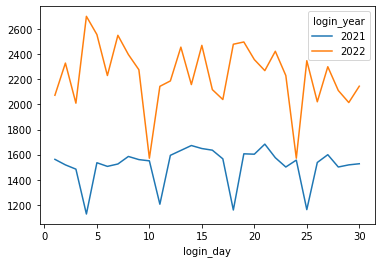

In [14]:
df_5 = df_logs.pivot_table(
    index='login_day',
    columns='login_year',
    values='user_id',
    aggfunc='nunique'
)

df_5.plot();

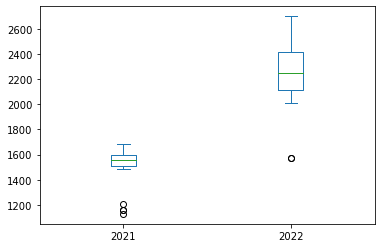

In [15]:
# DAU за 2022 год очевидно выше 2021 года в каждый день за исключением нескольких выбросов
df_5.plot.box();

In [16]:
# DAU взят, как медианное значение
df_6 = pd.DataFrame( df_5.describe().iloc[5] ).T
delta_column(df_6)

print(f"Медианный DAU вырос на {df_6.iloc[0,-1]:.2%}" )
df_6

delta done!
Медианный DAU вырос на 44.76%


login_year,2021,2022,delta
50%,"1,554.00","2,249.50",0.45


# 4.	Monthly Active User (MAU)

In [17]:
df_7 = df_logs.pivot_table(
    index='login_month',
    columns='login_year',
    values='user_id',
    aggfunc='nunique'
)

delta_column(df_7)

print(f"MAU вырос на {df_7.iloc[0,-1]:.2%}" )
df_7

delta done!
MAU вырос на 19.83%


login_year,2021,2022,delta
login_month,,,
7,10867,13022,0.20


# 5.	Наиболее популярные продаваемые товары (Топ-10)

In [18]:
# Для Топ-10 расчёт завёрнут в функцию, чтобы использовать дважы
def top_10_module(metric='order_quantity_accepted'):
    df = df_sales.query('sales_order_status == "Shipped"').merge(
        df_items,
        how='left',
        left_on='order_id',
        right_on='fk_order_id'
    ).groupby(
        ['creation_year','fk_product_id']
    )[[metric]].sum().reset_index().sort_values(
    by=['creation_year',metric], 
    ascending=[True, False]
    )
    
    df_top_10 = pd.DataFrame([], columns = df.columns)
    
    for year_col in df.creation_year.unique():
        df_plus = df.query(f'creation_year == {year_col}').head(10)
        
        df_plus.index = range(1, len( df_plus.index )+1)
        df_top_10 = pd.concat([df_top_10, df_plus])
        
    df_top_10 = df_top_10.reset_index()
    new_cols = list(df_top_10.columns[1:])
    
    new_cols.insert(0, 'top_10_place')
    df_top_10.columns = new_cols
    
    return df_top_10

In [19]:
top_10_module('order_quantity_accepted')

,top_10_place,creation_year,fk_product_id,order_quantity_accepted
0,1,2021,10235,1031
1,2,2021,8219,850
2,3,2021,8428,690
3,4,2021,9925,585
4,5,2021,8210,402
5,6,2021,1040,326
6,7,2021,1548,295
7,8,2021,8444,271
8,9,2021,10236,227
9,10,2021,8425,216


# 6.	Товары с самым высоким доходом

In [20]:
top_10_module('sales')

,top_10_place,creation_year,fk_product_id,sales
0,1,2021,8219,"11,337,874.30"
1,2,2021,8210,"5,315,500.50"
2,3,2021,7640,"2,696,077.60"
3,4,2021,1548,"2,563,695.52"
4,5,2021,10975,"2,340,908.30"
5,6,2021,9925,"1,794,376.67"
6,7,2021,3610,"1,720,389.00"
7,8,2021,10235,"1,395,574.47"
8,9,2021,8444,"1,388,173.40"
9,10,2021,1038,"1,275,489.12"


# 7.	Объем выручки

In [21]:
df_8 = df_sales.query('sales_order_status == "Shipped"').merge(
        df_items,
        how='left',
        left_on='order_id',
        right_on='fk_order_id'
    ).groupby(
        ['creation_year']
    )[['sales']].sum().T

delta_column(df_8)
print(f"Объём выручки вырос на {df_8.iloc[0,-1]:.2%}" )

df_8

delta done!
Объём выручки вырос на 91.38%


creation_year,2021,2022,delta
sales,"60,136,714.84","115,089,176.30",0.91


# может ли статус заказа повлиять на эффективность компании?

In [22]:
df_9 = df_logs.groupby('login_year')[['user_id']].nunique()
df_9

,user_id
login_year,
2021,10867
2022,13022


In [23]:
df_10 = df_sales.query('sales_order_status == "Shipped"').merge(
        df_items,
        how='left',
        left_on='order_id',
        right_on='fk_order_id'
    ).groupby('creation_year').agg(
    clients = ('fk_buyer_id', 'nunique'),
    sales = ('sales', 'sum')
)

df_10

,clients,sales
creation_year,,
2021,1519,"60,136,714.84"
2022,1910,"115,089,176.30"


In [24]:
df_11 = df_sales.merge(
        df_items,
        how='left',
        left_on='order_id',
        right_on='fk_order_id'
    ).groupby('creation_year').agg(
    clients = ('fk_buyer_id', 'nunique'),
    sales = ('sales', 'sum')
)

df_11

,clients,sales
creation_year,,
2021,2452,"60,315,970.97"
2022,2980,"116,858,178.44"


In [25]:
def t_s(df_1, df_2):
    df_new = df_1.join(df_2)
    
    df_new['CR'] = df_new['clients'] / df_new['user_id']
    df_new['ARPU'] = df_new['sales'] / df_new['user_id']
    df_new['ARPPU'] = df_new['sales'] / df_new['clients']
    
    return df_new

In [28]:
t_s_1 = t_s(df_9, df_11)
t_s_1

,user_id,clients,sales,CR,ARPU,ARPPU
login_year,,,,,,
2021,10867,2452,"60,315,970.97",0.23,"5,550.38","24,598.68"
2022,13022,2980,"116,858,178.44",0.23,"8,973.90","39,214.15"


In [29]:
t_s_2 = t_s(df_9, df_10)
t_s_2

,user_id,clients,sales,CR,ARPU,ARPPU
login_year,,,,,,
2021,10867,1519,"60,136,714.84",0.14,"5,533.88","39,589.67"
2022,13022,1910,"115,089,176.30",0.15,"8,838.06","60,256.11"


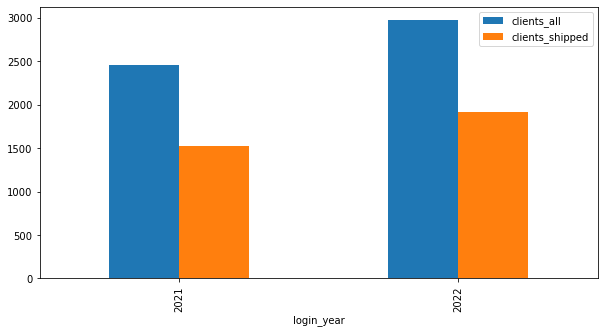

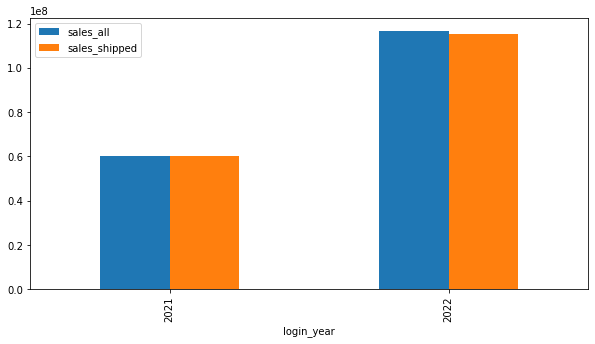

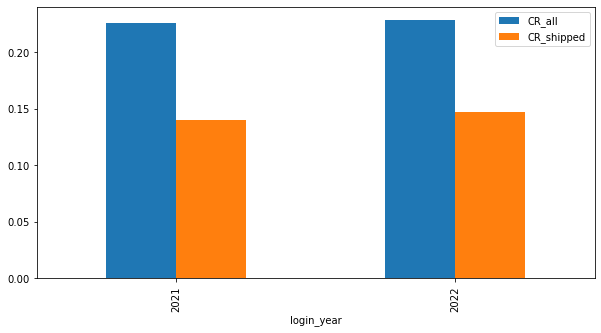

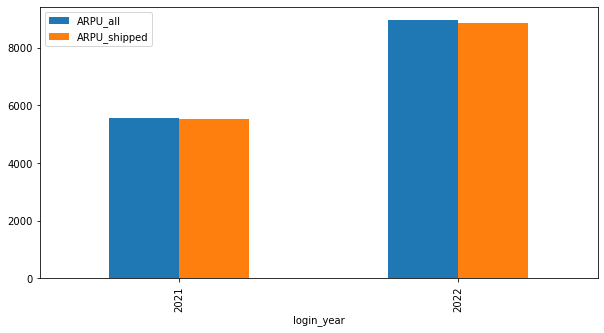

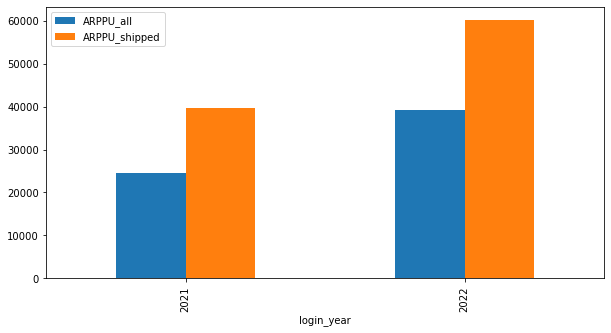

In [38]:
# Статус заказа влияет на конверсию и оценку охвата,
# Но не на метрики, связанные с итоговыми продажами
for col in t_s_2.columns[1:]:
    t_s_1[[col]].join(t_s_2[[col]], lsuffix='_all', rsuffix='_shipped').plot.bar(figsize=(10,5));
    plt.show();

# влияет ли частота входа на сайт на количество совершаемых заказов?

In [40]:
df_22 = df_logs.groupby(['user_id','login_year','login_day'])[['login_log_id']].nunique().reset_index()
col_list = ['user','year','day','logs']

df_22.columns = col_list
df_22 = df_22.set_index(col_list[:-1])

df_22

logs
user   year day      
972    2021 8       4
996    2021 2       4
            3       1
            5       4
            6       2
...               ...
225700 2022 30      4
225704 2022 30      3
225708 2022 30      8
225712 2022 30      2
225716 2022 30      2

[112495 rows x 1 columns]

In [41]:
df_23 = df_sales.groupby(['fk_buyer_id','creation_year','creation_day'])[['order_id']].count().reset_index()
col_list_1 = ['user','year','day','orders']

df_23.columns = col_list_1
df_23 = df_23.set_index(col_list_1[:-1])

df_23

orders
user   year day        
996    2021 2         1
            5         1
            17        2
            23        4
       2022 6         2
...                 ...
225532 2022 29        2
225552 2022 29        4
225664 2022 30        2
225676 2022 30        1
225684 2022 30        2

[9987 rows x 1 columns]

In [42]:
df_24 = df_22.join(df_23, 
           lsuffix='', 
           rsuffix=''
          ).fillna(0)

df_24

logs  orders
user   year day              
972    2021 8       4    0.00
996    2021 2       4    1.00
            3       1    0.00
            5       4    1.00
            6       2    0.00
...               ...     ...
225700 2022 30      4    0.00
225704 2022 30      3    0.00
225708 2022 30      8    0.00
225712 2022 30      2    0.00
225716 2022 30      2    0.00

[112495 rows x 2 columns]

In [43]:
df_24[ df_24['orders'] > 0 ]

logs  orders
user   year day              
996    2021 2       4    1.00
            5       4    1.00
            17      6    2.00
            23     12    4.00
       2022 6       3    2.00
...               ...     ...
225532 2022 29     20    2.00
225552 2022 29     52    4.00
225664 2022 30     24    2.00
225676 2022 30     15    1.00
225684 2022 30     28    2.00

[9983 rows x 2 columns]

In [44]:
f"Корреляция: {df_24[ df_24['orders'] > 0 ].corr().loc['logs','orders']:.2%}"

'Корреляция: 27.36%'

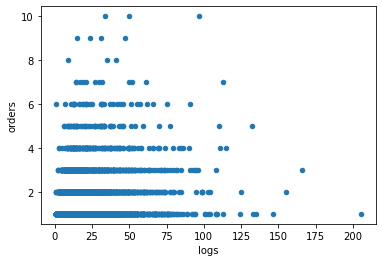

In [45]:
df_24[ df_24['orders'] > 0 ].plot.scatter(x='logs', y='orders');

In [46]:
y = df_24[ df_24['orders'] > 0 ]['orders']
x = df_24[ df_24['orders'] > 0 ][['logs']]
x = sm.add_constant (x)

In [47]:
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     807.5
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          7.05e-171
Time:                        15:58:09   Log-Likelihood:                -11824.
No. Observations:                9983   AIC:                         2.365e+04
Df Residuals:                    9981   BIC:                         2.367e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1265      0.012     97.713      0.0

In [48]:
df_24['orders_pred'] = df_24['logs'] * model.params['logs'] + model.params['const']
df_24

logs  orders  orders_pred
user   year day                           
972    2021 8       4    0.00         1.19
996    2021 2       4    1.00         1.19
            3       1    0.00         1.14
            5       4    1.00         1.19
            6       2    0.00         1.16
...               ...     ...          ...
225700 2022 30      4    0.00         1.19
225704 2022 30      3    0.00         1.17
225708 2022 30      8    0.00         1.25
225712 2022 30      2    0.00         1.16
225716 2022 30      2    0.00         1.16

[112495 rows x 3 columns]

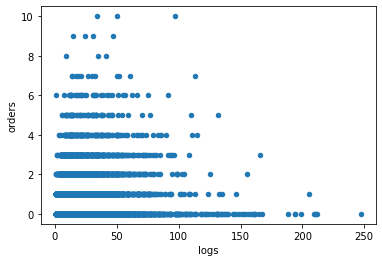

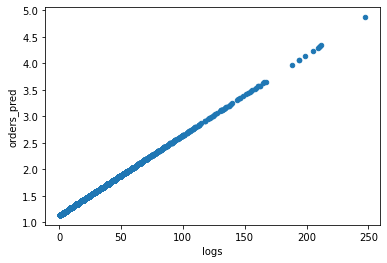

In [49]:
df_24.plot.scatter(x='logs', y='orders');
df_24.plot.scatter(x='logs', y='orders_pred');
plt.show();

In [50]:
for col in df_24.columns:
    df_24[f'{col}_log'] =  np.log10( df_24[col] )
    
df_24

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


logs  orders  orders_pred  logs_log  orders_log  \
user   year day                                                    
972    2021 8       4    0.00         1.19      0.60        -inf   
996    2021 2       4    1.00         1.19      0.60        0.00   
            3       1    0.00         1.14      0.00        -inf   
            5       4    1.00         1.19      0.60        0.00   
            6       2    0.00         1.16      0.30        -inf   
...               ...     ...          ...       ...         ...   
225700 2022 30      4    0.00         1.19      0.60        -inf   
225704 2022 30      3    0.00         1.17      0.48        -inf   
225708 2022 30      8    0.00         1.25      0.90        -inf   
225712 2022 30      2    0.00         1.16      0.30        -inf   
225716 2022 30      2    0.00         1.16      0.30        -inf   

                 orders_pred_log  
user   year day                   
972    2021 8               0.07  
996    2021 2               0.07  
            3               0.06  
            5               0.07  
            6               0.06  
...                          ...  
225700 2022 30              0.07  
225704 2022 30              0.07  
225708 2022 30              0.10  
225712 2022 30              0.06  
225716 2022 30              0.06  

[112495 rows x 6 columns]

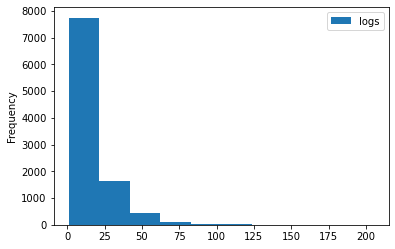

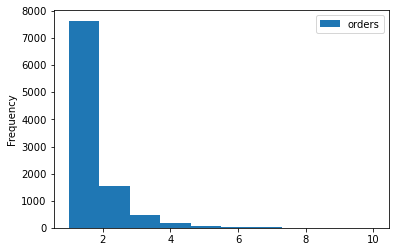

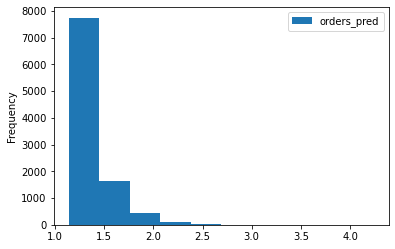

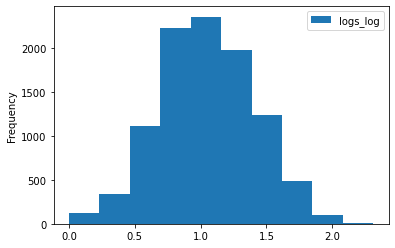

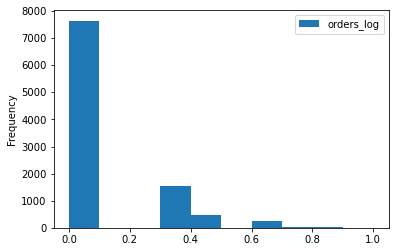

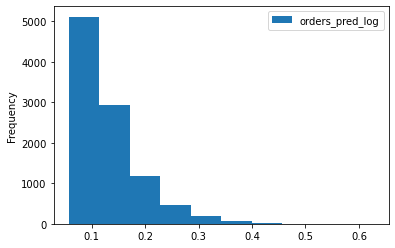

In [51]:
for col in df_24.columns:
    df_24[ df_24['orders'] > 0 ][[col]].plot.hist();

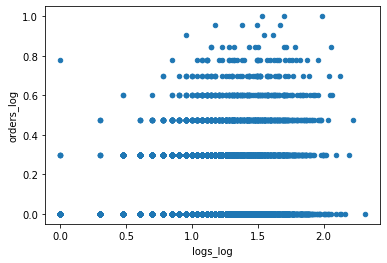

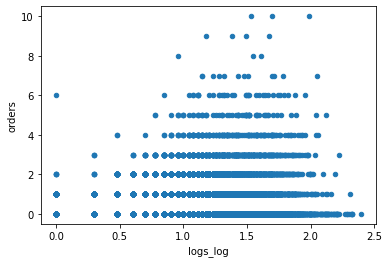

In [52]:
df_24[ df_24['orders'] > 0 ].plot.scatter(x='logs_log', y='orders_log');
df_24.plot.scatter(x='logs_log', y='orders');

In [54]:
df_25 = df_24[ df_24['orders'] > 0 ].corr()

df_25

,logs,orders,orders_pred,logs_log,orders_log,orders_pred_log
logs,1.00,0.27,1.00,0.86,0.28,0.99
orders,0.27,1.00,0.27,0.28,0.96,0.28
orders_pred,1.00,0.27,1.00,0.86,0.28,0.99
logs_log,0.86,0.28,0.86,1.00,0.30,0.91
orders_log,0.28,0.96,0.28,0.30,1.00,0.29
orders_pred_log,0.99,0.28,0.99,0.91,0.29,1.00


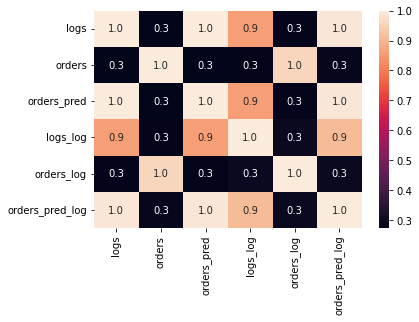

In [55]:
sns.heatmap(df_25, annot=True, fmt=".1f");

In [56]:
y = df_24[ df_24['orders'] > 0 ]['orders_log']
x = df_24[ df_24['orders'] > 0 ][['logs_log']]
x = sm.add_constant (x)

In [57]:
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             orders_log   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     951.9
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          9.96e-200
Time:                        15:59:08   Log-Likelihood:                 3704.0
No. Observations:                9983   AIC:                            -7404.
Df Residuals:                    9981   BIC:                            -7389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0518      0.005    -10.595      0.0

In [ ]:
# Количество логов в день очень слабо влияет на количество заказов.
# Корреляция до 30%, R^2 до 10%.

# Возможно, клиентов предварительно нужно сегментировать по другим признакам.
# Тогда внутри сегмента зависимость будет более выраженная.